In [6]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
% matplotib inline 

UsageError: Line magic function `%matplotib` not found.


In [7]:
#Import File
df = pd.read_csv("Default_On_Payment.csv", low_memory = False)

In [8]:
#Print many statements at the same time using this command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
#Explore Data
df.shape
type(df)
df.size
df.head()
df.tail()

(40119, 22)

pandas.core.frame.DataFrame

882618

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
0,100015,A14,27,A32,A40,2570,A61,A73,3,A92,...,A121,21,A143,A151,1,A173,1,A191,A201,1
1,100031,A11,12,A34,A43,385,A61,A74,4,A92,...,A121,58,A143,A152,4,A172,1,A192,A201,0
2,100046,A12,13,A34,A43,882,A61,A72,4,A93,...,A121,23,A143,A152,2,A173,1,A191,A201,0
3,100103,A14,24,A32,A40,1393,A61,A73,2,A93,...,A121,31,A143,A152,1,A173,1,A192,A201,0
4,100104,A11,24,A32,A40,3123,A61,A72,4,A92,...,A122,27,A143,A152,1,A173,1,A191,A201,1


,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Property,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment
40114,986907,A11,24,A32,A40,1285,A65,A74,4,A92,...,A124,32,A143,A151,1,A173,1,A191,A201,1
40115,986936,A12,24,A34,A49,1935,A61,A75,4,A91,...,A121,31,A143,A152,2,A173,1,A192,A201,1
40116,986939,A12,60,A32,A40,14027,A61,A74,4,A93,...,A124,27,A143,A152,1,A174,1,A192,A201,1
40117,986944,A12,36,A30,A43,3804,A61,A73,4,A92,...,A123,42,A143,A152,1,A173,1,A192,A201,1
40118,986974,A11,20,A34,A40,2235,A61,A73,4,A94,...,A122,33,A141,A151,2,A173,1,A191,A202,1


In [10]:
df.dtypes

Customer_ID                     int64
Status_Checking_Acc            object
Duration_in_Months              int64
Credit_History                 object
Purposre_Credit_Taken          object
Credit_Amount                   int64
Savings_Acc                    object
Years_At_Present_Employment    object
Inst_Rt_Income                  int64
Marital_Status_Gender          object
Other_Debtors_Guarantors       object
Current_Address_Yrs             int64
Property                       object
Age                             int64
Other_Inst_Plans               object
Housing                        object
Num_CC                          int64
Job                            object
Dependents                      int64
Telephone                      object
Foreign_Worker                 object
Default_On_Payment              int64
dtype: object

In [11]:
#Check for missing values
pd.isnull(df).any()
pd.isnull(df).sum()
#Find out type of each variable. Objects means string or categorical in the below output
df.info()

Customer_ID                    False
Status_Checking_Acc            False
Duration_in_Months             False
Credit_History                 False
Purposre_Credit_Taken          False
Credit_Amount                  False
Savings_Acc                    False
Years_At_Present_Employment    False
Inst_Rt_Income                 False
Marital_Status_Gender          False
Other_Debtors_Guarantors       False
Current_Address_Yrs            False
Property                       False
Age                            False
Other_Inst_Plans               False
Housing                        False
Num_CC                         False
Job                            False
Dependents                     False
Telephone                      False
Foreign_Worker                 False
Default_On_Payment             False
dtype: bool

Customer_ID                    0
Status_Checking_Acc            0
Duration_in_Months             0
Credit_History                 0
Purposre_Credit_Taken          0
Credit_Amount                  0
Savings_Acc                    0
Years_At_Present_Employment    0
Inst_Rt_Income                 0
Marital_Status_Gender          0
Other_Debtors_Guarantors       0
Current_Address_Yrs            0
Property                       0
Age                            0
Other_Inst_Plans               0
Housing                        0
Num_CC                         0
Job                            0
Dependents                     0
Telephone                      0
Foreign_Worker                 0
Default_On_Payment             0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40119 entries, 0 to 40118
Data columns (total 22 columns):
Customer_ID                    40119 non-null int64
Status_Checking_Acc            40119 non-null object
Duration_in_Months             40119 non-null int64
Credit_History                 40119 non-null object
Purposre_Credit_Taken          40119 non-null object
Credit_Amount                  40119 non-null int64
Savings_Acc                    40119 non-null object
Years_At_Present_Employment    40119 non-null object
Inst_Rt_Income                 40119 non-null int64
Marital_Status_Gender          40119 non-null object
Other_Debtors_Guarantors       40119 non-null object
Current_Address_Yrs            40119 non-null int64
Property                       40119 non-null object
Age                            40119 non-null int64
Other_Inst_Plans               40119 non-null object
Housing                        40119 non-null object
Num_CC                         40119 non-null int

In [12]:
df.describe()

,Customer_ID,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Default_On_Payment
count,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000,40119.000000
mean,552084.523642,20.902116,3271.281687,2.973379,2.845086,35.540442,1.407014,1.154889,0.299135
std,261363.936402,12.052772,2821.841476,1.118012,1.103048,11.366368,0.577355,0.361804,0.457885
min,100015.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,325148.500000,12.000000,1364.000000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,551443.000000,18.000000,2320.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,778206.000000,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,999961.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [13]:
#Find out the number of customers who defaulted or no
print('Count of labels')
df.groupby("Default_On_Payment").size()

Count of labels


Default_On_Payment
0    28118
1    12001
dtype: int64

In [14]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40119 entries, 0 to 40118
Data columns (total 22 columns):
Customer_ID                    40119 non-null int64
Status_Checking_Acc            40119 non-null object
Duration_in_Months             40119 non-null int64
Credit_History                 40119 non-null object
Purposre_Credit_Taken          40119 non-null object
Credit_Amount                  40119 non-null int64
Savings_Acc                    40119 non-null object
Years_At_Present_Employment    40119 non-null object
Inst_Rt_Income                 40119 non-null int64
Marital_Status_Gender          40119 non-null object
Other_Debtors_Guarantors       40119 non-null object
Current_Address_Yrs            40119 non-null int64
Property                       40119 non-null object
Age                            40119 non-null int64
Other_Inst_Plans               40119 non-null object
Housing                        40119 non-null object
Num_CC                         40119 non-null int

Index(['Customer_ID', 'Status_Checking_Acc', 'Duration_in_Months',
       'Credit_History', 'Purposre_Credit_Taken', 'Credit_Amount',
       'Savings_Acc', 'Years_At_Present_Employment', 'Inst_Rt_Income',
       'Marital_Status_Gender', 'Other_Debtors_Guarantors',
       'Current_Address_Yrs', 'Property', 'Age', 'Other_Inst_Plans ',
       'Housing', 'Num_CC', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker',
       'Default_On_Payment'],
      dtype='object')

In [27]:
pd.pivot_table(df,index=['Other_Inst_Plans '])

,Age,Credit_Amount,Current_Address_Yrs,Customer_ID,Default_On_Payment,Dependents,Duration_in_Months,Inst_Rt_Income,Num_CC
Other_Inst_Plans,,,,,,,,,
A141,36.854477,3549.282074,2.884981,544473.142293,0.410192,1.222681,21.986722,2.928764,1.468150
A142,34.958090,3578.018568,2.572944,542861.000000,0.403183,1.170292,24.460477,3.256764,1.467905
A143,35.349836,3206.142984,2.853985,553915.593429,0.274180,1.142433,20.511681,2.964637,1.393068


In [28]:
# Seperate out independent categorical variables for conversion in to numeric. We will remove all numeric variables from the dataframe and remove customer ID as we aren't interested in this variable

x_catg = df.loc[:,('Status_Checking_Acc', 'Credit_History', 'Purposre_Credit_Taken', 'Savings_Acc', 'Years_At_Present_Employment', 'Marital_Status_Gender', 'Other_Debtors_Guarantors','Property', 'Other_Inst_Plans ','Housing', 'Job', 'Telephone', 'Foreign_Worker')]
x_catg.head()
x_catg.shape

,Status_Checking_Acc,Credit_History,Purposre_Credit_Taken,Savings_Acc,Years_At_Present_Employment,Marital_Status_Gender,Other_Debtors_Guarantors,Property,Other_Inst_Plans,Housing,Job,Telephone,Foreign_Worker
0,A14,A32,A40,A61,A73,A92,A101,A121,A143,A151,A173,A191,A201
1,A11,A34,A43,A61,A74,A92,A101,A121,A143,A152,A172,A192,A201
2,A12,A34,A43,A61,A72,A93,A103,A121,A143,A152,A173,A191,A201
3,A14,A32,A40,A61,A73,A93,A103,A121,A143,A152,A173,A192,A201
4,A11,A32,A40,A61,A72,A92,A101,A122,A143,A152,A173,A191,A201


(40119, 13)

In [30]:
# Seperate out independent numeric variables in a new data frame
x_num = df.loc[:,('Duration_in_Months', 'Credit_Amount', 'Inst_Rt_Income', 'Current_Address_Yrs', 'Age', 'Num_CC', 'Dependents')]
x_num.head()

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents
0,27,2570,3,3,21,1,1
1,12,385,4,3,58,4,1
2,13,882,4,4,23,2,1
3,24,1393,2,2,31,1,1
4,24,3123,4,1,27,1,1


In [29]:
# Convert categorical variables in to dummy coding like 0, 1
x_num1 = pd.get_dummies(x_catg)
x_num1.head()

,Status_Checking_Acc_A11,Status_Checking_Acc_A12,Status_Checking_Acc_A13,Status_Checking_Acc_A14,Credit_History_A30,Credit_History_A31,Credit_History_A32,Credit_History_A33,Credit_History_A34,Purposre_Credit_Taken_A40,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign_Worker_A201,Foreign_Worker_A202
0,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,1,0
2,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1,1,0
4,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0


In [31]:
# Add all the Xs together for our analysis and create a single X variable which would include all Xs
# Axis = 1 means we are adding by columns
x = pd.concat([x_num, x_num1], axis = 1)
x.head()

,Duration_in_Months,Credit_Amount,Inst_Rt_Income,Current_Address_Yrs,Age,Num_CC,Dependents,Status_Checking_Acc_A11,Status_Checking_Acc_A12,Status_Checking_Acc_A13,...,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Telephone_A191,Telephone_A192,Foreign_Worker_A201,Foreign_Worker_A202
0,27,2570,3,3,21,1,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,12,385,4,3,58,4,1,1,0,0,...,1,0,0,1,0,0,0,1,1,0
2,13,882,4,4,23,2,1,0,1,0,...,1,0,0,0,1,0,1,0,1,0
3,24,1393,2,2,31,1,1,0,0,0,...,1,0,0,0,1,0,0,1,1,0
4,24,3123,4,1,27,1,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0


In [32]:
y = df['Default_On_Payment']
y.head()

0    1
1    0
2    0
3    0
4    1
Name: Default_On_Payment, dtype: int64

In [33]:
# Checking that there is noting wrong with my X
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40119 entries, 0 to 40118
Data columns (total 61 columns):
Duration_in_Months                 40119 non-null int64
Credit_Amount                      40119 non-null int64
Inst_Rt_Income                     40119 non-null int64
Current_Address_Yrs                40119 non-null int64
Age                                40119 non-null int64
Num_CC                             40119 non-null int64
Dependents                         40119 non-null int64
Status_Checking_Acc_A11            40119 non-null uint8
Status_Checking_Acc_A12            40119 non-null uint8
Status_Checking_Acc_A13            40119 non-null uint8
Status_Checking_Acc_A14            40119 non-null uint8
Credit_History_A30                 40119 non-null uint8
Credit_History_A31                 40119 non-null uint8
Credit_History_A32                 40119 non-null uint8
Credit_History_A33                 40119 non-null uint8
Credit_History_A34                 40119 non-null u

In [34]:
#Create train, test data with 75% and 25% split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(30089, 61)

(10030, 61)

(30089,)

(10030,)

In [35]:
# Let's import the logistics regression object and build model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
log.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
log.coef_

array([[ 2.62139704e-02,  1.23748604e-04,  3.34906003e-01,
         3.15209099e-03, -1.24276512e-02,  2.85391022e-01,
         2.13790450e-01,  5.43595533e-01,  1.63757712e-01,
        -3.41958475e-01, -1.17758764e+00,  3.24779686e-01,
         5.39423583e-01, -1.83210522e-01, -4.36743550e-01,
        -1.05644207e+00,  6.73274366e-01, -9.12469451e-01,
        -7.27371066e-01, -7.70551227e-02, -2.25408045e-01,
         1.15706041e-01,  4.69610468e-01,  6.44290322e-01,
        -7.57465950e-01, -1.53044299e-02,  4.15867802e-01,
         7.75255995e-02,  1.25769129e-01, -9.34545354e-01,
        -4.96810045e-01,  1.26242814e-01,  4.65949218e-02,
        -8.27489903e-02, -7.14621133e-01, -1.87660480e-01,
         1.26408345e-01, -1.14390452e-01, -6.45182402e-01,
        -1.79028360e-01, -1.21357896e-01,  3.46675043e-01,
        -1.03751002e+00, -5.34372811e-01, -2.47598943e-01,
        -2.99737869e-01,  2.69516754e-01, -4.49125603e-02,
        -1.12342265e-01, -6.54938043e-01,  1.12469870e-0

In [38]:
#Find out the key predictors of Churn
# np.transpose(log.coef_ - We are doing this because log_coef_ was in a row and we are transposing it to a column
coeff = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(log.coef_))], axis = 1)
coeff.columns = ("Variables", "Coeff")
coeff.sort_values('Variables', ascending = True)

,Variables,Coeff
4,Age,-0.012428
1,Credit_Amount,0.000124
11,Credit_History_A30,0.324780
12,Credit_History_A31,0.539424
13,Credit_History_A32,-0.183211
14,Credit_History_A33,-0.436744
15,Credit_History_A34,-1.056442
3,Current_Address_Yrs,0.003152
6,Dependents,0.213790
0,Duration_in_Months,0.026214


In [39]:
# Generate model diagnostics
classes = log.predict(test_x)
print(classes.size)
print("Positive cases in Test Data:", test_y[test_y==1].shape[0])
print("Negetive case in Test Data:", test_y[test_y==0].shape[0])

10030
Positive cases in Test Data: 2999
Negetive case in Test Data: 7031


In [40]:
classes.shape

(10030,)

In [41]:
# Precision and Recall
print('Accuracy Score')
print(metrics.accuracy_score(test_y, classes))
print('Precision/recall Metrics')
print(metrics.classification_report(test_y, classes))
print('AUC')
auc = metrics.roc_auc_score(test_y, classes)
auc
#auc = Area under the curve

Accuracy Score
0.7874376869391825
Precision/recall Metrics
             precision    recall  f1-score   support

          0       0.82      0.90      0.86      7031
          1       0.69      0.53      0.60      2999

avg / total       0.78      0.79      0.78     10030

AUC


0.7137688099607848

Text(0.5,1,'ROCR CHART')

(0, 1)

(0, 1)

Text(0,0.5,'True Positive Rate')

Text(0.5,0,'False Positive Rate')

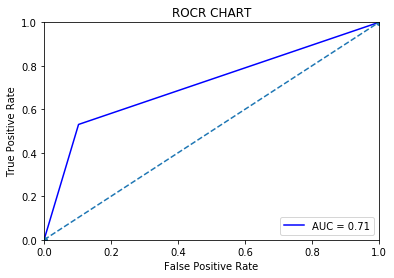

In [42]:
#ROC Chart
#fpr = False positive, tpr = true positive
fpr, tpr, th = roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix


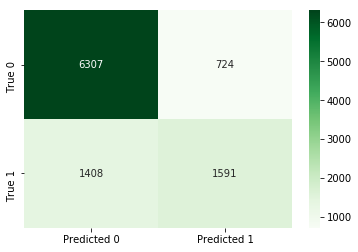

In [43]:
# Confusion Matrix
print('Confusion Matrix')
cf= metrics.confusion_matrix(test_y, classes)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot = True,cmap = "Greens", fmt="d", xticklabels=lbl1, yticklabels = lbl2)
plt.show()